# Visualizations of editing activity in en.wikipedia.org

By [Stuart Geiger](http://stuartgeiger.com), Berkeley Institute for Data Science

(C) 2016, Released under [The MIT license](https://opensource.org/licenses/MIT).

This data is collected and aggregated by Erik Zachte, which is [here](https://stats.wikimedia.org/EN/TablesWikipediaEN.htm) for the English Wikipedia. I have just copied that data from HTML tables into a CSV (which is not done here), then imported it into Pandas dataframes, and plotted it with matplotlib.

## Processing and cleaning data

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')


In [2]:
# Data by Erik Zachte at https://stats.wikimedia.org/EN/TablesWikipediaEN.htm
counts = pd.read_csv("edit_counts.tsv", sep="\t")


In [3]:
# Data by Stuart Geiger
# Random sample of 50000 users who have registered and made a userpage
# Then, how many edits did they make 1 to 2 years after their registration date

retention = pd.read_csv("retention.tsv", sep="\t")
retention.reg_date=pd.to_datetime(retention.reg_date,format="%Y%m%d%H%M%S")

In [4]:
def survived(edits):
    if edits > 0:
        return 1
    else:
        return 0

In [5]:
retention['survival'] = retention.edits_1yr.apply(survived)

In [6]:
retention[0:10]

,user_id,reg_date,reg_month,edits_1yr,survival
0,20158302,2013-11-17 00:09:33,2013-11,0,0
1,2769023,2006-11-16 05:15:26,2006-11,0,0
2,844241,2006-01-27 00:12:48,2006-01,0,0
3,21450716,2014-05-21 11:32:39,2014-05,0,0
4,13065449,2010-09-13 08:21:23,2010-09,0,0
5,18001221,2012-12-01 16:40:53,2012-12,0,0
6,16768147,2012-05-05 10:30:56,2012-05,0,0
7,15109629,2011-08-09 19:45:39,2011-08,0,0
8,9368423,2009-04-02 20:47:54,2009-04,0,0
9,253629,2005-04-30 15:01:19,2005-04,2,1


In [7]:
# Convert dates to datetimes
counts.date=pd.to_datetime(counts.date,infer_datetime_format=True)


In [8]:
# Peek at the dataset
counts[0:10]

,date,user accounts,new accts,>5 edits,>100 edits,article count,articles > 200ch,new per day,mean edits,edits
0,2001-01-01,1,1,0,0,25,12,1,9.4,234
1,2001-02-01,6,5,6,0,153,129,5,5.8,661
2,2001-03-01,18,12,20,0,566,533,13,3.7,1.2 k
3,2001-04-01,29,11,21,1,1.1 k,787,18,2.7,872
4,2001-05-01,37,8,24,2,2.3 k,1.3 k,38,2.1,1.9 k
5,2001-06-01,45,8,25,1,2.7 k,1.6 k,13,2.2,966
6,2001-07-01,61,16,47,0,3.5 k,2.3 k,27,2.2,1.7 k
7,2001-08-01,84,23,58,2,5.0 k,3.6 k,49,2.1,2.9 k
8,2001-09-01,128,44,99,6,7.7 k,5.7 k,88,2.1,5.5 k
9,2001-10-01,176,48,122,14,12 k,9.2 k,133,2.1,9.0 k


Some of the columns use 'k' for thousands and 'M' for millions, so we need to convert them.

In [9]:

def units_convert(s):
    """
    Convert cells with k and M to times 1,000 and 1,000,000 respectively
    
    I got this solution from 
    http://stackoverflow.com/questions/14218728/converting-string-of-numbers-and-letters-to-int-float-in-pandas-dataframe
    """
    
    powers = {'k': 1000, 'M': 10 ** 6}

    if(s[-1] == 'k' or s[-1] == 'M'):
        try:
            power = s[-1]
            return float(s[:-1]) * powers[power]
        except TypeError:
            return float(s)
    else:
        return float(s)
    


In [10]:
# Apply this function to the columns that have 'k' or 'M' units, store them as new _float columns
counts['edits_float']=counts.edits.apply(units_convert)
counts['article_count_float']=counts['article count'].apply(units_convert)

In [11]:
# Make sure we've got data types figured out
counts.dtypes

date                   datetime64[ns]
user accounts                   int64
new accts                       int64
>5 edits                        int64
>100 edits                      int64
article count                  object
articles > 200ch               object
new per day                     int64
mean edits                    float64
edits                          object
edits_float                   float64
article_count_float           float64
dtype: object

In [12]:
# Set date column as index

counts.set_index(['date'])

# Calculate some ratios

counts['highly_active_to_newcomer_ratio']=counts['>100 edits']/counts['new accts']
counts['active_to_newcomer_ratio']=counts['>5 edits']/counts['new accts']
counts['highly_active_to_active_ratio']=counts['>100 edits']/(counts['>5 edits']-counts['>100 edits'])


## Graphs

### Editor retention

In [13]:
import datetime
def dt_to_yearmofirst(dt):
    """
    Adding one year to the reg date, because we are looking at if people who registered were still editing 1 year later
    """
    year= dt.year + 1
    month= dt.month
    return datetime.datetime(year=year,month=month,day=1)

In [14]:
retention['reg_mo_first'] = retention.reg_date.apply(dt_to_yearmofirst)

retention[0:10]

,user_id,reg_date,reg_month,edits_1yr,survival,reg_mo_first
0,20158302,2013-11-17 00:09:33,2013-11,0,0,2014-11-01
1,2769023,2006-11-16 05:15:26,2006-11,0,0,2007-11-01
2,844241,2006-01-27 00:12:48,2006-01,0,0,2007-01-01
3,21450716,2014-05-21 11:32:39,2014-05,0,0,2015-05-01
4,13065449,2010-09-13 08:21:23,2010-09,0,0,2011-09-01
5,18001221,2012-12-01 16:40:53,2012-12,0,0,2013-12-01
6,16768147,2012-05-05 10:30:56,2012-05,0,0,2013-05-01
7,15109629,2011-08-09 19:45:39,2011-08,0,0,2012-08-01
8,9368423,2009-04-02 20:47:54,2009-04,0,0,2010-04-01
9,253629,2005-04-30 15:01:19,2005-04,2,1,2006-04-01


In [15]:
retention_group = retention.groupby(["reg_mo_first"])
monthly_averages = retention_group.aggregate({"survival":np.mean})

In [16]:
def add_year(dt):
    year = dt.year + 1
    month = dt.month
    day = dt.day
    return datetime.datetime(year, month, day)

Filter because there is missing data before 2003 and counts after July 2014 aren't accurate

In [17]:

monthly_avg = monthly_averages[monthly_averages.index>datetime.datetime(2004,1,1)]
monthly_avg= monthly_avg[monthly_avg.index<datetime.datetime(2014,9,1)]


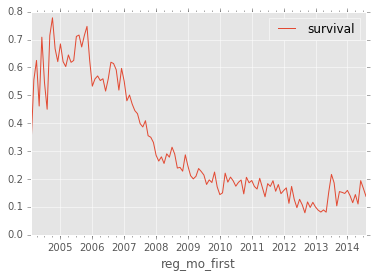

In [18]:
monthly_avg.plot()

### Number of editors

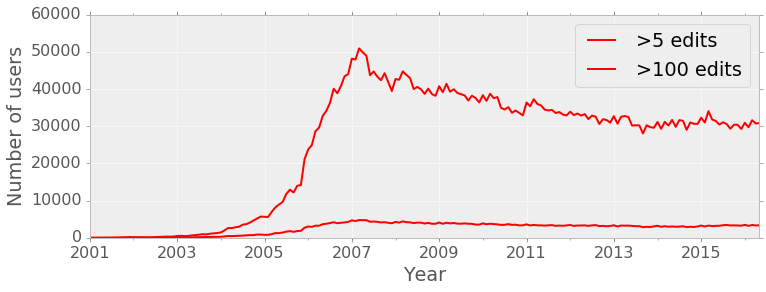

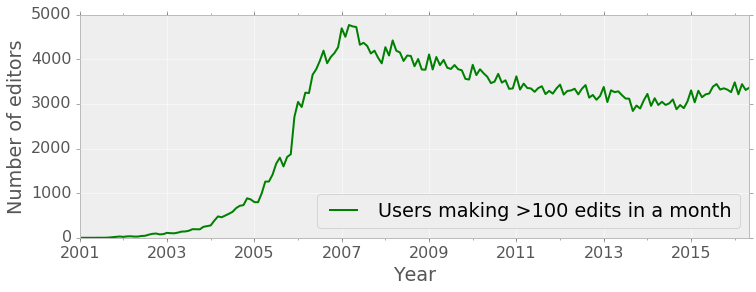

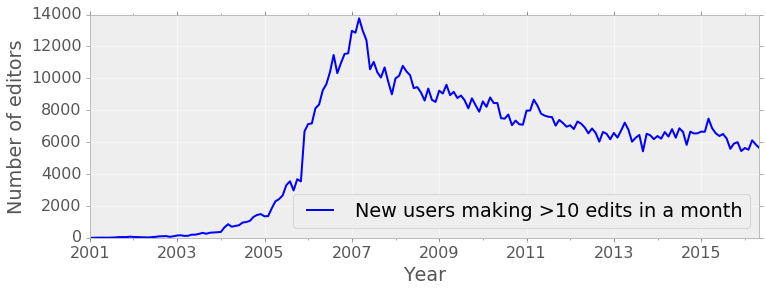

In [19]:
matplotlib.style.use(['bmh'])
font = {'weight' : 'regular',
        'size'   : 16}

matplotlib.rc('font', **font)

ax1 = counts.plot(x='date',y=['>5 edits', '>100 edits'], figsize=(12,4), 
                  label="Users making >5 edits in a month", color="r")

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of users")

ax2 = counts.plot(x='date',y='>100 edits', figsize=(12,4), 
                  label="Users making >100 edits in a month",color="g")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of editors")

ax3 = counts.plot(x='date',y='new accts', figsize=(12,4), 
                  label="New users making >10 edits in a month",color="b")
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of editors")
ax3.yaxis.set_major_formatter(ScalarFormatter())

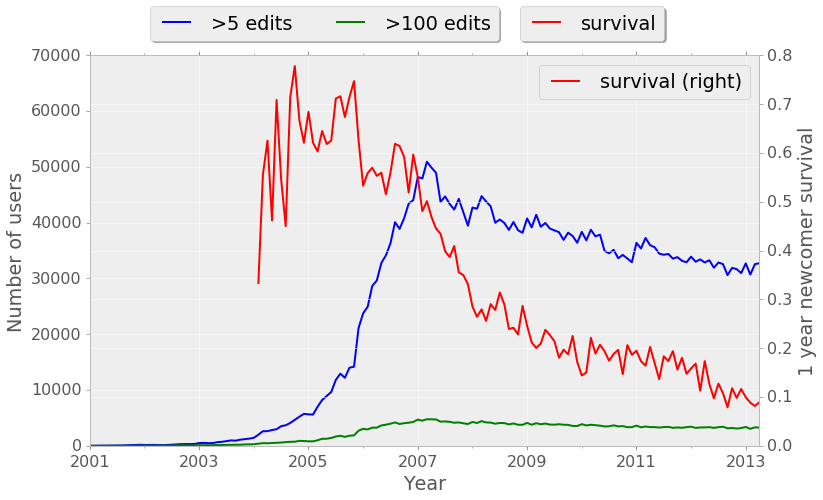

In [20]:
matplotlib.style.use(['bmh'])
font = {'weight' : 'regular',
        'size'   : 16}

matplotlib.rc('font', **font)

ax1 = counts.plot(x='date',y=['>5 edits', '>100 edits'], figsize=(12,7), 
                  label="Users making >5 edits in a month", color="bg")

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of users")
ax1.set_ylim(0,70000)

ax2 = ax1.twinx()

ax2 = monthly_avg.plot(ax=ax2,secondary_y=True,color="r")

ax1.set_xlim(372,519)

ax1.legend(loc='upper center', bbox_to_anchor=(0.35, 1.15),
          ncol=2, fancybox=True, shadow=True)
ax2.legend(loc='upper center', bbox_to_anchor=(0.75, 1.15),
          ncol=1, fancybox=True, shadow=True)
ax2.set_ylabel("1 year newcomer survival")



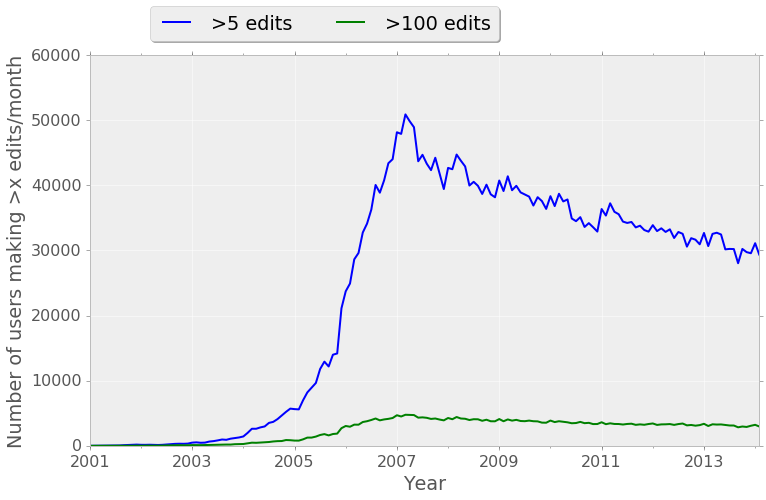

In [21]:
matplotlib.style.use(['bmh'])
font = {'weight' : 'regular',
        'size'   : 16}

matplotlib.rc('font', **font)

ax1 = counts.plot(x='date',y=['>5 edits', '>100 edits'], figsize=(12,7), 
                  label="Users making >5 edits in a month", color="bg")

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of users making >x edits/month")
ax1.set_ylim(0,60000)


ax1.set_xlim(372,529)

ax1.legend(loc='upper center', bbox_to_anchor=(0.35, 1.15),
          ncol=2, fancybox=True, shadow=True)



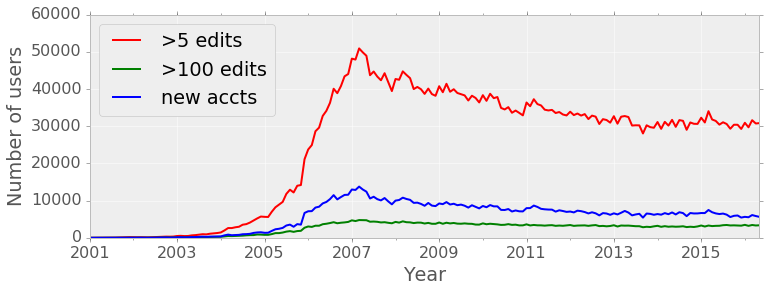

In [23]:
ax1 = counts.plot(x='date',y=['>5 edits','>100 edits','new accts'], figsize=(12,4), 
                  label="Users making >5 edits in a month",color=['r','g','b'])

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of users")
ax1.yaxis.set_major_formatter(ScalarFormatter())

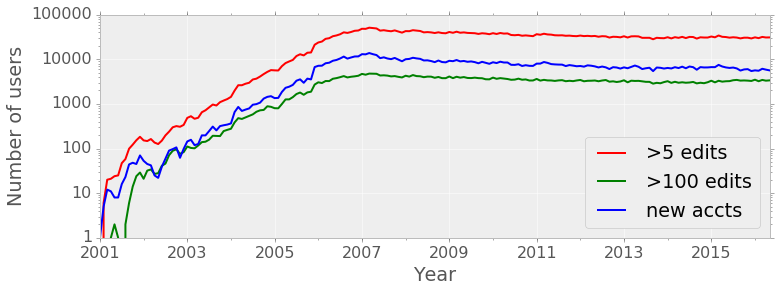

In [27]:
ax1 = counts.plot(x='date',y=['>5 edits','>100 edits','new accts'], figsize=(12,4), 
                  label="Users making >5 edits in a month",logy=True, color=['r','g','b'])

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of users")
ax1.yaxis.set_major_formatter(ScalarFormatter())


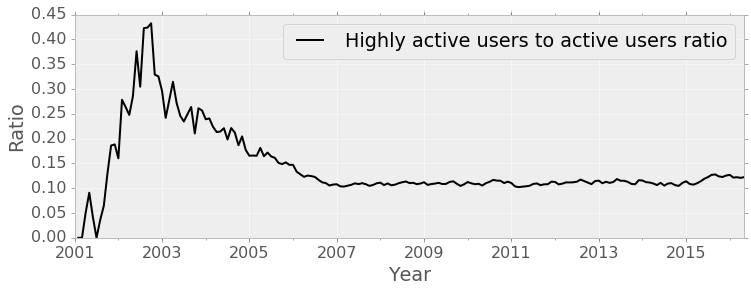

In [28]:
ax3 = counts.plot(x='date',y='highly_active_to_active_ratio', figsize=(12,4), 
                  label="Highly active users to active users ratio",color="k")
ax3.set_xlabel("Year")
ax3.set_ylabel("Ratio")

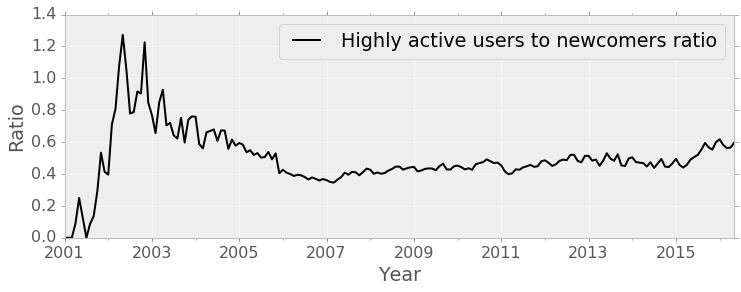

In [29]:

ax3 = counts.plot(x='date',y='highly_active_to_newcomer_ratio', figsize=(12,4), 
                  label="Highly active users to newcomers ratio",color="k")
ax3.set_xlabel("Year")
ax3.set_ylabel("Ratio")

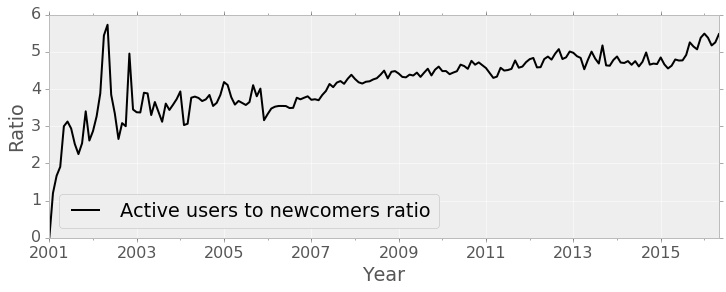

In [30]:

ax3 = counts.plot(x='date',y='active_to_newcomer_ratio', figsize=(12,4), 
                  label="Active users to newcomers ratio",color="k")
ax3.set_xlabel("Year")
ax3.set_ylabel("Ratio")

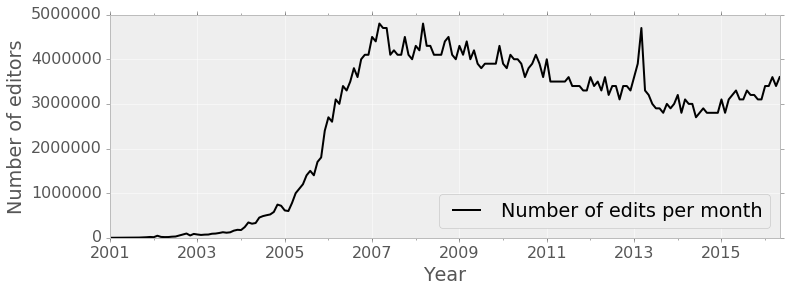

In [31]:

ax3 = counts.plot(x='date',y='edits_float', figsize=(12,4), 
                  label="Number of edits per month",color="k")
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of editors")

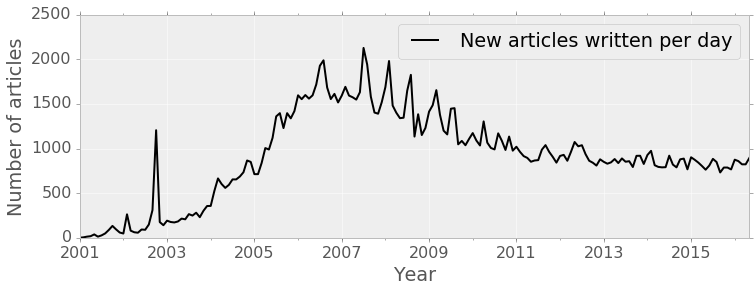

In [32]:

ax3 = counts.plot(x='date',y='new per day', figsize=(12,4), 
                  label="New articles written per day",color="k")
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of articles")

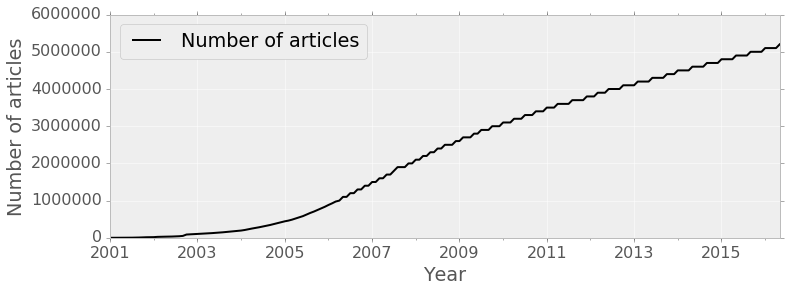

In [33]:

ax3 = counts.plot(x='date',y='article_count_float', figsize=(12,4), 
                  label="Number of articles",color="k")
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of articles")

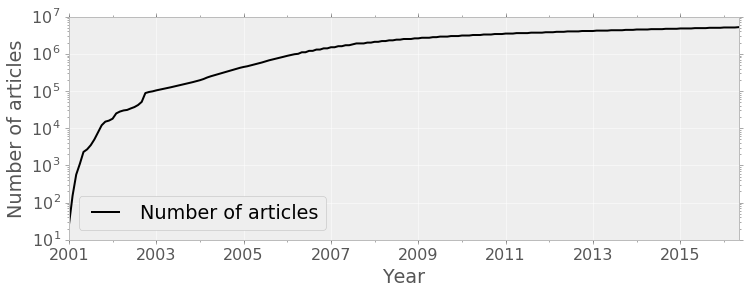

In [34]:
ax3 = counts.plot(x='date',y='article_count_float', figsize=(12,4), 
                  label="Number of articles",color="k",logy=True)
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of articles")